# Testing if our data are compatible with the COCO format using the pycoco tools

In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random

In [ ]:
from pycocotools.coco import COCO

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/pets-train-coco-format.json" pets-train-coco-format.json

In [ ]:
!cp "/content/drive/My Drive/pets-test-coco-format.json" pets-test-coco-format.json

In [ ]:
!cp "/content/drive/My Drive/pets-train-37-coco-format.json" pets-train-37-coco-format.json

In [ ]:
!cp "/content/drive/My Drive/pets-test-37-coco-format.json" pets-test-37-coco-format.json

In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2021-04-15 12:29:25--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  35.4MB/s    in 22s     

2021-04-15 12:29:47 (34.2 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]



In [ ]:
!tar -xf images.tar.gz

In [ ]:
coco = COCO('pets-train-37-coco-format.json')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Abyssinian american_bulldog american_pit_bull_terrier basset_hound beagle Bengal Birman Bombay boxer British_Shorthair chihuahua Egyptian_Mau english_cocker_spaniel english_setter german_shorthaired great_pyrenees havanese japanese_chin keeshond leonberger Maine_Coon miniature_pinscher newfoundland Persian pomeranian pug Ragdoll Russian_Blue saint_bernard samoyed scottish_terrier shiba_inu Siamese Sphynx staffordshire_bull_terrier wheaten_terrier yorkshire_terrier

COCO supercategories: 
Cat Dog


In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['Abyssinian'])
imgIds = coco.getImgIds(catIds=catIds);

In [ ]:
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

In [ ]:
img_path = 'images/'

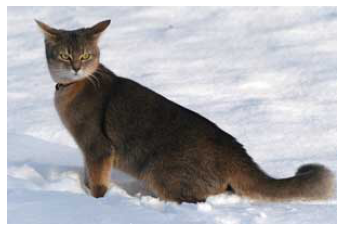

In [ ]:
I = io.imread(img_path + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

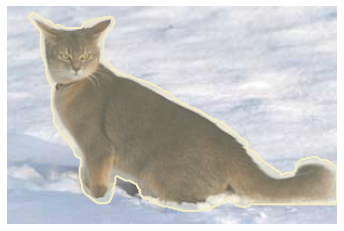

In [ ]:
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

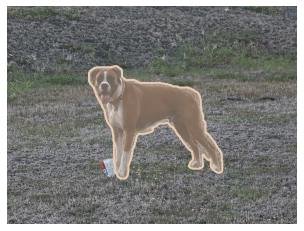

In [ ]:
cat_nms = [cat['name'] for cat in cats]
name = random.choice(cat_nms)
catIds = coco.getCatIds(catNms=[name])
imgIds = coco.getImgIds(catIds=catIds)
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
I = io.imread(img_path + img['file_name'])
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
plt.show()